<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-The-most-Nobel-of-Prizes" data-toc-modified-id="1.-The-most-Nobel-of-Prizes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. The most Nobel of Prizes</a></span></li><li><span><a href="#2.-So,-who-gets-the-Nobel-Prize?" data-toc-modified-id="2.-So,-who-gets-the-Nobel-Prize?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. So, who gets the Nobel Prize?</a></span></li><li><span><a href="#3.-USA-dominance" data-toc-modified-id="3.-USA-dominance-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3. USA dominance</a></span></li><li><span><a href="#4.-USA-dominance,-visualized" data-toc-modified-id="4.-USA-dominance,-visualized-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>4. USA dominance, visualized</a></span></li><li><span><a href="#5.-What-is-the-gender-of-a-typical-Nobel-Prize-winner?" data-toc-modified-id="5.-What-is-the-gender-of-a-typical-Nobel-Prize-winner?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>5. What is the gender of a typical Nobel Prize winner?</a></span></li><li><span><a href="#6.-The-first-woman-to-win-the-Nobel-Prize" data-toc-modified-id="6.-The-first-woman-to-win-the-Nobel-Prize-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>6. The first woman to win the Nobel Prize</a></span></li><li><span><a href="#7.-Repeat-laureates" data-toc-modified-id="7.-Repeat-laureates-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>7. Repeat laureates</a></span></li><li><span><a href="#8.-How-old-are-you-when-you-get-the-prize?" data-toc-modified-id="8.-How-old-are-you-when-you-get-the-prize?-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>8. How old are you when you get the prize?</a></span></li><li><span><a href="#9.-Age-differences-between-prize-categories" data-toc-modified-id="9.-Age-differences-between-prize-categories-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>9. Age differences between prize categories</a></span></li><li><span><a href="#10.-Oldest-and-youngest-winners" data-toc-modified-id="10.-Oldest-and-youngest-winners-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>10. Oldest and youngest winners</a></span></li></ul></div>

## 1. The most Nobel of Prizes
<p><img style="float: right;margin:5px 20px 5px 1px; max-width:150px" src="https://assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>
<p>The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?</p>
<p>Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.</p>

In [9]:
# Loading in required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in the Nobel Prize data
nobel = pd.read_csv('nobel.csv')

# Taking a look at the first several winners
nobel.head()


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


## 2. So, who gets the Nobel Prize?
<p>Just looking at the first couple of prize winners, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented? </p>
<p>(For <em>country</em>, we will use the <code>birth_country</code> of the winner, as the <code>organization_country</code> is <code>NaN</code> for all shared Nobel Prizes.)</p>

In [10]:
# Display the number of (possibly shared) Nobel Prizes handed out between 1901 and 2016
len(nobel[nobel.year <= 2016])


911

<Axes: >

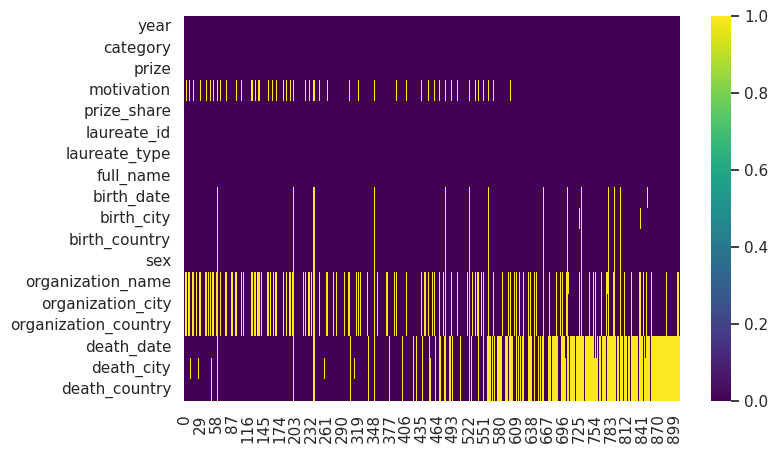

In [11]:
sns.heatmap(nobel.transpose().isnull(), cmap='viridis')

In [12]:
# Display the number of prizes won by male and female recipients.
nobel.groupby('sex').size()

sex
Female     49
Male      836
dtype: int64

In [13]:
# Display the number of prizes won by the top 10 nationalities.
nobel.groupby('organization_country').size().sort_values(ascending=False)[:10]

organization_country
United States of America               341
United Kingdom                          89
Germany                                 43
France                                  36
Federal Republic of Germany             23
Switzerland                             21
Sweden                                  17
Japan                                   16
Netherlands                             11
Union of Soviet Socialist Republics      9
dtype: int64

## 3. USA dominance
<p>Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?</p>

In [14]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel["year"] / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby("decade",as_index=False)["usa_born_winner"].mean()


# Display the proportions of USA born winners per decade
prop_usa_winners


,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


## 4. USA dominance, visualized
<p>A table is OK, but to <em>see</em> when the USA started to dominate the Nobel charts we need a plot!</p>

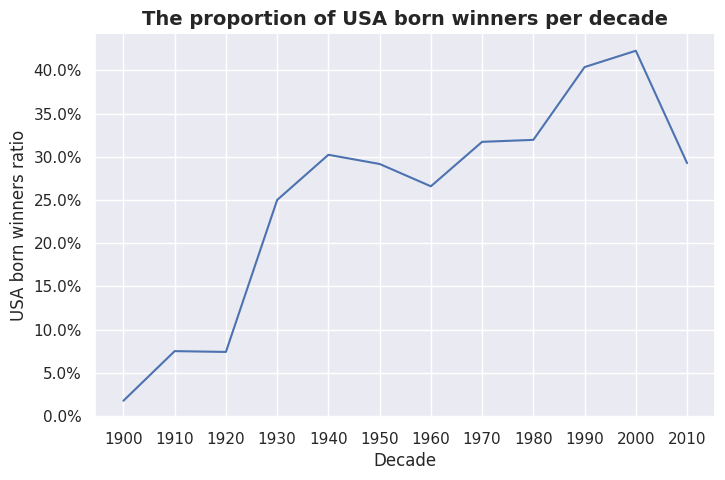

In [15]:
# Setting the plotting theme and setting the size of all plots.
sns.set()
plt.rcParams['figure.figsize'] = [8, 5]

# Plotting USA born winners 
ax = sns.lineplot(x="decade" ,y="usa_born_winner", data=prop_usa_winners)

# Adding axes' labels and title
plt.title("The proportion of USA born winners per decade", 
          fontdict={'fontsize': 14},
          fontweight ='bold',
          loc='center')
plt.ylabel("USA born winners ratio")
plt.xlabel("Decade")
plt.xticks(range(1900,2020,10))
# Adding %-formatting to the y-axis§
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

## 5. What is the gender of a typical Nobel Prize winner?
<p>So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are <em>men</em>. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?</p>

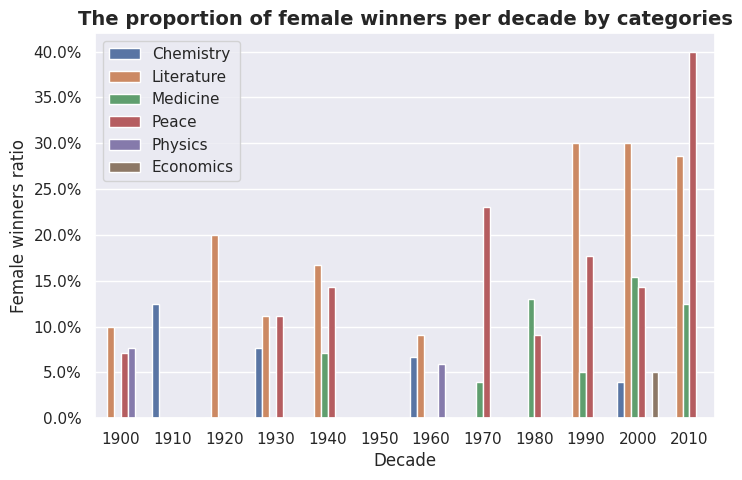

In [16]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel["sex"]=="Female"
prop_female_winners = nobel.groupby(["decade","category"], as_index=False)["female_winner"].mean()

# Plotting female winners 
ax = sns.barplot(x="decade", y="female_winner", hue="category", data=prop_female_winners)

# Adding axes' labels, title and legend
plt.title("The proportion of female winners per decade by categories", 
          fontdict={'fontsize': 14},
          fontweight ='bold',
          loc='center')
plt.ylabel("Female winners ratio")
plt.xlabel("Decade")
plt.legend(loc='upper left')

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

<p>Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.</p> Let's see the imbalance between the number of female and male winners by dividing them into age groups and calculating the distribution ratio. And visualize this data!</p>

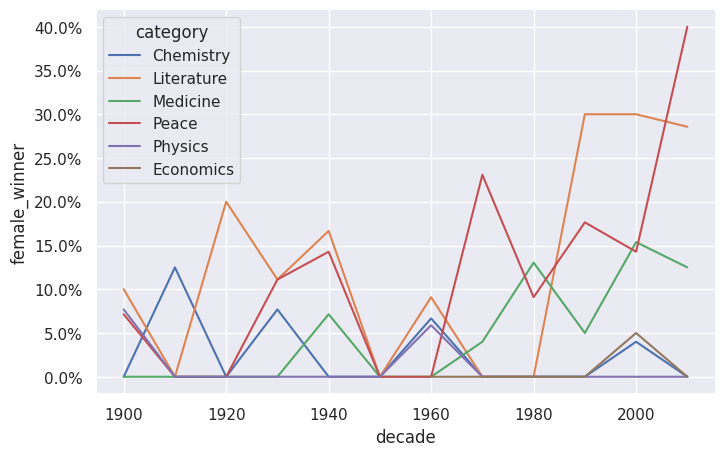

In [17]:
# Plotting female winners with % winners on the y-axis
ax = sns.lineplot(x='decade', y='female_winner', hue='category', data=prop_female_winners)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

In [18]:
# Converting birth_date from String to datetime
nobel['birth_date'] = pd.to_datetime(nobel.birth_date)

# Calculating the age of Nobel Prize winners
nobel['age'] = nobel["year"] - nobel['birth_date'].dt.year

# Creating age categories
bins = [nobel["age"].min()-1,29,39,49,59,69,79,nobel["age"].max()]
label = ["<-29","30-39","40-49","50-59","60-69","70-79","80+"]
nobel["age_interval"] = pd.cut(nobel["age"], bins=bins, labels = label)

# Total number of winners
total = float(len(nobel))

# Grouping winners by age interval and sex 
nobel_age_interval = nobel.groupby(["sex","age_interval"])["laureate_id"].count()
nobel_age_interval = pd.DataFrame(nobel_age_interval).reset_index()
nobel_age_interval.columns = ["sex","age_interval","number_of_winners"]

# Calculation of the distribution ratio by age interval and sex
nobel_age_interval["ratio"] = round((nobel_age_interval["number_of_winners"]/total)*100,2)
nobel_age_interval.head()

,sex,age_interval,number_of_winners,ratio
0,Female,<-29,1,0.11
1,Female,30-39,7,0.77
2,Female,40-49,6,0.66
3,Female,50-59,13,1.43
4,Female,60-69,8,0.88


## 6. The first woman to win the Nobel Prize
<p>Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?</p>

In [30]:
# Picking out the first woman to win a Nobel Prize

nobel[nobel["sex"]=="Female"].nsmallest(1, columns="year")

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age,age_interval
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True,36.0,30-39


## 7. Repeat laureates
<p>For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these few people?</p>

In [32]:
# Selecting the laureates that have received 2 or more prizes.
nobel.groupby('full_name').filter(lambda group: len(group) >= 2).sort_values('full_name')


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age,age_interval
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,False,1910,False,NaN,NaN
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,False,1940,False,NaN,NaN
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,False,1960,False,NaN,NaN
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950,False,40.0,40-49
505,1980,Chemistry,The Nobel Prize in Chemistry 1980,"""for their contributions concerning the determ...",1/4,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1980,False,62.0,60-69
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1950,False,48.0,40-49
424,1972,Physics,The Nobel Prize in Physics 1972,"""for their jointly developed theory of superco...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1970,False,64.0,60-69
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950,False,53.0,50-59
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960,False,61.0,60-69
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True,36.0,30-39


## 8. How old are you when you get the prize?
<p>The list of repeat winners contains some illustrious names! But how old are you generally when you get the prize?</p>

In [21]:
# Converting birth_date from String to datetime

# Calculating the age of Nobel Prize winners

# Plotting the age of Nobel Prize winners


In [22]:
# Plotting the age of Nobel Prize winners


# Adding axes' labels, title and legend


## 9. Age differences between prize categories
<p>The plot above shows us a lot! We see that people use to be around 55 when they received the price, but nowadays the average is closer to 65. But there is a large spread in the laureates' ages, and while most are 50+, some are very young.</p>
<p>We also see that the density of points is much high nowadays than in the early 1900s -- nowadays many more of the prizes are shared, and so there are many more winners. We also see that there was a disruption in awarded prizes around the Second World War (1939 - 1945). </p>
<p>Let's look at age trends within different prize categories.</p>

In [23]:
# Same plot as above, but separate plots for each type of Nobel Prize


In [24]:
# Same plot as above, but separate plots for each type of Nobel Prize


More plots with lots of exciting stuff going on! We see that both winners of the chemistry, medicine, and physics prize have gotten older over time. 
* The trend is strongest for physics: the average age used to be below 50, and now it's almost 70. 
* Literature and economics are more stable. We also see that economics is a newer category. 
* But peace shows an opposite trend where winners are getting younger!

## 10. Oldest and youngest winners
<p>In the peace category we also a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?</p>

In [25]:
# The name of the youngest winner of the Nobel Prize as of 2014
